In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import *
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def to_classes(categ):
    return np.array(list(map(lambda x:np.argmax(x),categ)))

In [3]:
df = pd.read_csv("./1115-TRAIN-CANCER-NORMAL.csv",sep=';',index_col=0,decimal=",").round(3)
df = shuffle(df) 
df.head(5)

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660,merged.numeric
TCGA-OR-A5K8-01,2.230,-9.966,0.972,-9.966,1.556,-9.966,5.628,-4.608,-9.966,-4.293,...,-9.966,-9.966,-3.626,-0.357,-9.966,-9.966,-3.171,-9.966,1.334,1
TCGA-36-1577-01,3.621,-2.932,4.006,-4.608,5.143,-9.966,4.848,-0.320,-5.574,0.276,...,-5.012,-9.966,4.540,0.688,-1.470,-3.816,0.979,-9.966,2.428,38
GTEX-146FR-0926-SM-5QGPE,4.173,-1.355,6.735,-9.966,4.195,-3.047,6.540,-3.171,-5.574,-9.966,...,-9.966,-1.056,1.064,-9.966,-2.826,-5.012,-0.072,-9.966,0.661,22
TCGA-WE-AAA3-06,1.050,-9.966,3.872,-9.966,6.540,-9.966,7.416,-9.966,-9.966,1.158,...,-9.966,-9.966,-2.826,-9.966,-6.506,-9.966,-0.472,-9.966,-1.470,49
TCGA-EM-A3FL-01,5.519,-9.966,2.958,-9.966,4.073,-9.966,5.567,-9.966,-9.966,-6.506,...,-9.966,-9.966,-5.574,0.252,-9.966,-6.506,6.651,-9.966,2.345,57


In [4]:
#x = 1/(1+np.exp(df.iloc[:,:-1])).values
x=df.iloc[:,:-1].values
y = df['merged.numeric'].values


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = np_utils.to_categorical(y_train, 65)
y_test = np_utils.to_categorical(y_test, 65)
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (17404, 3778)
Testing matrix shape (916, 3778)


In [6]:
model = Sequential()
model.add(Dense(2000, activation='sigmoid', input_shape=(3778,)))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(65, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=100,
          batch_size=500)
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
17404/17404 [==============================] - 1s 65us/step - loss: 2.8034 - acc: 0.3970
Epoch 2/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.7793 - acc: 0.8200
Epoch 3/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.3591 - acc: 0.9119
Epoch 4/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.2480 - acc: 0.9384
Epoch 5/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.2103 - acc: 0.9456
Epoch 6/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.1990 - acc: 0.9472
Epoch 7/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.1755 - acc: 0.9527
Epoch 8/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.1599 - acc: 0.9575
Epoch 9/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.1526 - acc: 0.9591
Epoch 10/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.1508 - a

17404/17404 [==============================] - 1s 33us/step - loss: 0.0999 - acc: 0.9682
Epoch 82/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.1099 - acc: 0.9650
Epoch 83/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.1186 - acc: 0.9614
Epoch 84/100
17404/17404 [==============================] - 1s 32us/step - loss: 0.1031 - acc: 0.9671
Epoch 85/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.0989 - acc: 0.9697
Epoch 86/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.0980 - acc: 0.9690
Epoch 87/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.1163 - acc: 0.9623
Epoch 88/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.1059 - acc: 0.9667
Epoch 89/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.0935 - acc: 0.9705
Epoch 90/100
17404/17404 [==============================] - 1s 33us/step - loss: 0.0932 - acc: 

In [15]:
K.clear_session()

In [9]:
y_test_pre=model.predict_classes(x_test)

916/916 [==============================] - 0s 49us/step


In [10]:
print(y_test_pre)

[26 53 13 44 29 49 44  1 53 37 44 26 50 17 33 30 57 38 29 34 37 10 21 56 64
 60 11 29 16 32 50 23 10  9 49 41 32 44 49  8 41 22 19 38 53  7 44 19  5 49
 37 37 21 24 13 29 57 25 10 53 48 13 49 34 37 10 26 15 50  6 10 10 10 32 38
 44 10 42 59 32  9 49 23 23 42 49 35 44 35 54 49 42 10 50 50 40 60 29 30 19
 58 41 26 34 22 15 48 33 11 53 57  2 19 19 10  2  9 54 57 30 57 21 58 53  5
  9 57 11 16 13 42 49 15 38 36 48 23 36 22 36 60 34 23  2 32 38 19 59 35 27
 36 15 32 23 10  5 26 25 39 26 13  2 10 26  9 10 37 59 32 50 32 36 37 38 32
  9 57 63 38 41 38  7 21 21  7  9 19 43 44 38 50  6 19 18  5 23 10 53 50 23
 29 23 29 37 15 61  2 37 23 59 10 22 47 17 23 22 23  2 57 57 21 58 49  6 28
 34 32 37 32 43 26  7 42 37 36 49 38  9  9 57 38  9 63 26  7 57 55 10 10 30
 64 42  9  7  6 24 19  6 53 60 23 10 57 50 26 35 10  9  9 11 34 57 38 44 10
 14 26  9 19 49 18 23 10 17 40 13 29 56 38 26 51 50 16 54  6  7 15 19 37 59
 24 32 36 19  3 30 22 10 48 33 19 10  2  9  5 21 23  6 26 16 32 10  9 48  5
 15  2  3 63

In [30]:
y_test_pre

array([48, 32, 10,  6, 57,  3, 32, 33, 49, 49, 57,  6, 32, 49, 19, 18, 10,
       42, 55, 38,  2,  5, 55, 56,  2, 36, 10, 50, 32, 27, 61, 42, 25, 30,
        7, 24, 29,  1, 29,  2, 53, 22, 55, 48, 34, 30, 34,  7, 50, 54, 38,
       49, 15, 50,  3, 61,  3, 40, 18, 40, 30, 18, 41, 49,  9, 50, 19, 60,
       29, 11, 57, 41, 16, 13, 13, 34, 48,  2, 45,  9, 39, 22, 19, 21, 11,
       28,  7, 34, 10, 10, 44, 10, 28, 48, 13, 48, 23, 38, 27, 23, 39, 22,
       38, 44,  6, 23, 18, 32, 57, 59,  7, 39, 16, 19, 38, 32, 49, 28, 62,
       11, 38, 13, 38, 23, 13, 60, 50, 10, 52,  5, 42, 19, 53, 49, 10, 19,
       53, 32, 10, 22, 38, 26, 54, 34, 33, 57,  2, 49,  7, 19, 48, 44, 62,
       37, 22, 60,  7, 10,  6,  2, 33, 50,  2, 45, 40, 57, 44, 41, 10, 53,
       40, 19,  9, 38,  9, 13, 21, 32, 22, 49, 10, 44, 50, 29, 15,  2, 30,
        9, 21, 36, 23, 15,  9, 44, 10, 26, 26, 26,  5, 61, 54, 32,  5, 53,
       15, 48, 34, 43, 19, 29, 29,  9, 37, 30, 29, 63, 26, 64, 58, 26, 34,
       53, 36, 26, 29, 32

In [34]:
icgc=pd.read_csv("./ICGC-EXPR.csv",sep=';',index_col=0,decimal=",").round(3).fillna(0)

In [37]:
icgc=np.log2(icgc+0.001)

In [39]:
x_test=icgc.values

In [66]:
icgc_out=open('../03.icgc/icgc_class_pre.txt','w')

In [68]:
s=''
for i in y_test_pre:
    s=s+','+str(i)
print(s)

,18,15,28,23,10,57,26,24,17,21,28,38,10,57,60,38,10,40,48,38,10,10,26,30,30,30,17,38,28,17,53,27,38,26,30,38,26,26,26,57,17,30,10,10,10,17,26,38,44,49,17,10,26,10,34,44,10,24,30,60,10,30,38,32,32,10,49,38,40,26,26,34,15,28,13,10,38,49,40,30,60,21,24,29,30,34,6,24,26,28,57,26,49,34,49,10,40,29,38,27,24,38,6,17,32,26,10,17,44,29,53,38,6,26,17,24,38,23,53,17,27,34,24,24,30,24,38,17,27,38,34,26,57,30,24,26,57,26,13,5,23,26,38,23,49,17,17,60,32,30,57,10,29,38,17,53,13,49,30,13,10,38,17,53,6,60,38,32,6,40,26,17,5,17,27,15,49,30,17,10,17,26,38,53,49,6,30,10,23,21,57,17,13,32,23,29,38,40,23,10,23,32,26,34,21,15,26,49,10,46,23,57,57,57,34,40,57,28,24,26,10,34,34,60,38,26,49,10,26,32,34,38,26,29,60,5,32,26,23,30,21,40,34,40,10,6,46,48,38,53,6,26,38,6,28,6,23,5,21,49,38,32,30,34,34,38,49,32,6,27,17,30,32,26,60,60,23,26,10,48,57,26,17,21,10,28,13,34,26,26,26,60,32,53,32,5,5,34,26,26,30,53,23,10,6,10,10,57,6,15,32,10,23,5,38,29,28,6,44,28,6,17,38,13,10,34,26,17,49,53,26,53,38,29,6,44,28,38,30,30,40

In [70]:
y_test_pre[-1]

46

In [3]:
df=1/(1+np.exp(df))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              7558000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               1600800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 65)                52065     
Total params: 9,210,865
Trainable params: 9,210,865
Non-trainable params: 0
_________________________________________________________________


(array([  1.00700000e+03,   1.44000000e+02,   4.90000000e+01,
          3.90000000e+01,   5.10000000e+01,   4.30000000e+01,
          2.90000000e+01,   2.90000000e+01,   2.90000000e+01,
          2.80000000e+01,   2.60000000e+01,   2.60000000e+01,
          2.00000000e+01,   2.20000000e+01,   1.70000000e+01,
          1.30000000e+01,   2.10000000e+01,   1.80000000e+01,
          0.00000000e+00,   1.50000000e+01,   2.10000000e+01,
          9.00000000e+00,   1.70000000e+01,   9.00000000e+00,
          0.00000000e+00,   1.30000000e+01,   1.90000000e+01,
          1.40000000e+01,   1.40000000e+01,   0.00000000e+00,
          1.00000000e+01,   7.00000000e+00,   1.40000000e+01,
          7.00000000e+00,   1.20000000e+01,   0.00000000e+00,
          2.20000000e+01,   1.50000000e+01,   1.30000000e+01,
          1.30000000e+01,   0.00000000e+00,   1.20000000e+01,
          4.00000000e+00,   1.40000000e+01,   4.00000000e+00,
          9.00000000e+00,   1.10000000e+01,   0.00000000e+00,
        

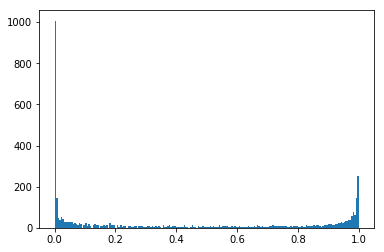

In [21]:
plt.hist(1/(1+np.exp(-x_train[1])),bins=200)